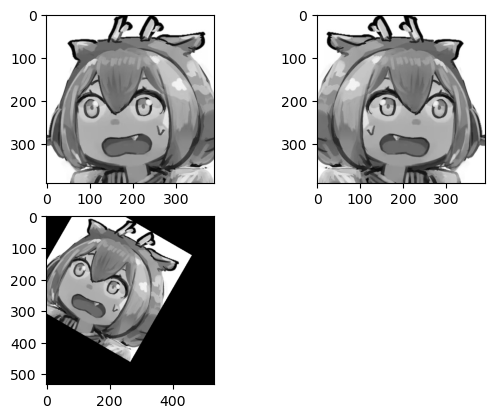

In [2]:
#实验：用matlab或python编程实现（可以不使用工具包提供的函数）图像的平移，镜像和旋转，以及这三种几何变换的复合。
import cv2
import numpy as np
import matplotlib.pyplot as plt

def jingxiang(image):
    height, width = image.shape[:2]
    dst = np.zeros([height, width])
    for x in range(height):
        for y in range(width):
            dst[x,y] = image[x,width-y-1]
    return dst

def rotate_image(image, angle):
    theta = np.radians(angle)
    height, width = image.shape[:2]
    new_height = int(width * np.abs(np.sin(theta)) + height * np.abs(np.cos(theta)))
    new_width = int(height * np.abs(np.sin(theta)) + width * np.abs(np.cos(theta)))
    new_image = np.zeros((new_height, new_width), dtype=np.uint8)
    center_x = width / 2
    center_y = height / 2
    for i in range(new_height):
        for j in range(new_width):
            x = (j - center_x) * np.cos(theta) + (i - center_y) * np.sin(theta) + center_x
            y = -(j - center_x) * np.sin(theta) + (i - center_y) * np.cos(theta) + center_y
            if x >= 0 and x < width and y >= 0 and y < height:
                new_image[i, j] = image[int(y), int(x)]
    return new_image
 
img = cv2.imread('touxiang.jpg',0)
img1 = jingxiang(img)
img2 = rotate_image(img,30)

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(img1, 'gray')
plt.subplot(223), plt.imshow(img2, 'gray')

plt.show()